# Data Analytics III

                                      -By Aditya Nikam(TE AI & DS)
    
1Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.

2.Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate,
Precision, Recall on the given dataset.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')#we use this to ignore the warnings means in the output warnings should not appear

C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\champ\Downloads\IRIS.csv")#this is to import the dataset.
#The dataset is a csv file.df is the name given to the dataset
df#this is written to display the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()#it display the first five rows of the dataset.Its default value is 5

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()#It gives the summary of the dataframe and it tells how many non null values are there in each column ,what 
#is the data type of each coloumn,how many columns are there in the dataset
#Here we can see that in our dataset there are 5 coloumns where 4 coloumns have float Datatype
#1 coloumns has object data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()#This displays the number of null values in each column

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
x=df[['sepal_length','sepal_width','petal_length','petal_width']]#Input to our model
y=df['species']#Output for our model

In [7]:
from sklearn.model_selection import train_test_split#Here we are importing train_test_split from sci-kit learn
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)#We are taking the values of 
#sepal_length,sepal_width,petal_length,petal_width which are inputs(X) for the model and Purchased which is output for 
#the model(Y) So we are dividing their values into training and testing 80% of data is training
#test_size=0.2 denotes 20% of data wil be testing dataset
#random state ensures that whenever we run the program every time the same values of the data are taken for training 
#and testing means suppose we have 100 records in our data out of which we are using 80  for training and 20 for testing
#so every time the same 80 values will be in training and same 20 values will be in testing means not a single record of 
#training data will go in the testing data and not single value of testing data will come in training data means there will
#be no shuffling of records the same data will be used for training and testing every time we run the program this is 
#the use of random state

#In random_state=42 42 is just a normal number there is no role of zero we have to just write it when we are using 
#random_state  we can use any other number other than zero as well like 1,4,10 etc.42 is the most common number you see
#in programs

In [8]:
print(len(xtrain))#it will print the no.of records(rows)of input which will be used in training dataset
print(len(ytrain))#it will print the no.of records(rows)of outputwhich will be used in training dataset
print(len(xtest))#it will print the no.of records(rows)of input which will be used in testing dataset
print(len(ytest))#it will print the no.of records(rows)of output which will be used in testing dataset

120
120
30
30


In [9]:
from sklearn.naive_bayes import GaussianNB#we are importing Gaussian Naive Bayes from sci-kit learn
model = GaussianNB()#we created object of Gaussian Naive Bayes

#We have used GaussianNB because our input which is sepal_length,sepal_width,petal_length,petal_width are all numeric
#and when we have numeric data then we use GaussianNB which is a type of Naive Bayes

#Naive Bayes is a machine learning algorithm used when we want to predict a category from the input like here we will
#predict categories like Iris-setosa Iris-virginica etc so we have imported Gaussian NB from Naive Bayes.
#It is based on Bayes’ Theorem, which uses probability to guess the right class.

#Bayes’ Theorem Formula:
#                                𝑃(𝐴∣𝐵)=𝑃(𝐵∣𝐴)×𝑃(𝐴)/𝑃(𝐵)

#Simple Meaning:
#"What is the chance of A happening, if B has already happened?"
#For example:
#What's the chance a student passed, if we know they studied 10 hours?

In [10]:
model.fit(xtrain,ytrain)#it teaches the Gaussian NB model using the training dataset means here we have the inputs
#in xtrain and we have outputs also already defit for the inputs in ytrain now the model learns this data so that it 
#can predict values when any unseen/new data comes to predict

GaussianNB()

In [11]:
y_pred = model.predict(xtest)#it tells the model to predict the output for the input(xtest).We are testing the model here
#after training

In [12]:
from sklearn.metrics import accuracy_score #sklearn.metric is used to import metrics
score=accuracy_score(ytest,y_pred)#Accuracy score formula is number of correct predictions/total no.of predictions
#ytest means the correct outputs and y_predicted means predicted output

In [13]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest, y_pred)#it creates a confusion matrix of model's predicted answers
#(y_pred)and actual answers(ytest)
print("Confusion Matrix:\n", cm)

#Confusion Matrix is a table that helps you to know how well the model is performing.It divides the predictions in four 
#types which are True Positive(TP),True Negative(TN),False Positive(FP) & False Negative(FN)

#True Positive(TP)means when model predicted answers match to the actual output
#Like for Example if a model predicts that student will pass the exam and if the student really passes the exam then its 
#True Positive

##True Negative(TN)also means when model predicted answers match to the actual output
#Like for Example if a model predicts that student will fail the exam and if the student fails(actual output) the exam 
#then its True Negative

#False Positive(FP) and False Negative(FN) means when the model predicted answers match to the actual output

#Like for Example if a model predicts that student will fail the exam and if the student pass(actual output) the exam 
#then its False Negative(FN)

#If a model predicts that student will pass the exam and if the student fails(actual output) the exam 
#then its False Positive

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


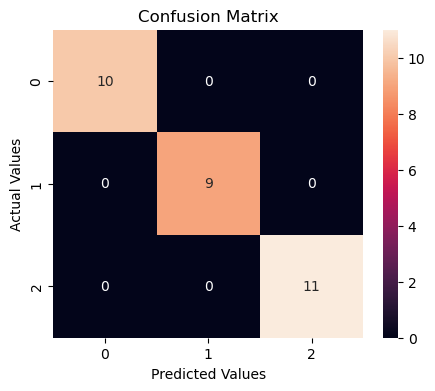

In [14]:
#Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))#plotted the size of the heatmp
sns.heatmap(cm, annot=True)#annot=True is used to print the numbers like 10,0,9,11 in the boxes of the heatmap
plt.title('Confusion Matrix')#Title of heatmap
plt.ylabel('Actual Values')#label for y axis
plt.xlabel('Predicted Values')#label for x axis
plt.show()#used to display the plot(in this case heatmp)

#In this heatmap lighter colors indicate more number and darker color indicate very less number or zero

#Heatmap is used to show Confusion matrix because its visually appealing and better than normal confusion matrix
#because heatmap adds colors to confusion matrix

#Here 0,1,and 2 on x and y axis of heatmap indicate the classes of the output means 0 means Iris Setosa
#1 means Iris Versicolor and 2 means Iris Virginica now you will wonder where and how these numbers are assigned
#so the answer is that we know that our output column(y)is species so the values of Species are column are converted into 
#numeric values in Species column Iris Setosa is the first unique value so it is assigned number zero then the next 
#unique value is Iris Versicolor so it is assigned number 1 and then the next unique value is Iris Virginica so that is 
#assigned value as 2 this all is done internally

#Here our confusion matrix is 3x3 because there are three classes in Species column which are Iris Setosa,Iris Versicolor 
#and Iris Virginica if there were only two classes then the confusion matrix would have be 2x2

#These heatmap/confusion matrix tells that all 11 Iris Setosa species were predicted correctly all 9 Iris Versicolor 
#were predicted correctly and all 11 Iris Versicolor we predicted correctly means the model has not made any mistakes
#in prediction thats why the model accuracy is 1.00 means 100%

#Now you will tell that the datset has 150 rows so how only 10,11, and 9 predicted correctly gives 100% accuracy the answer 
#to this is that out of 150 records we used 30 records for training so 10+11+9=30 thats what our record in training 
#dataset were

#What is happening in this heatmap/confusion matrix is that the heatmap is reduced to 2x2 size internally then confusion 
#matrix has now in y axis 0 value means class is Iris Setosa yes and 0 in x axis means model predicts Iris Setosa as yes
#and 1 on x axis means class 1&2(Iris Versicolor and Iris Verginica)no and 1 on y axis means class class 1&2(Iris Versicolor 
#and Iris Verginica)no so model predicts all Iris Setosa values correctly so all 10 values are True Positive similarly
#for others
#For better understanding see this youtube video  https://www.youtube.com/watch?v=gkNccYwtAbU

In [15]:
TP = cm[1][1]#Model predicted class 1 and it was actually class 1
FP = cm[0][1]#Model predicted class 0 and it was actually  class 1
TN = cm[0][0]#Model predicted class 0 and it was actually  class 0
FN = cm[1][0]#Model predicted class 1 and it was actually  class 0

#Here we have calculated the TP,FP,TN and FN values for class 1(Iris Versicolor) only

In [16]:
print("TP =",TP)#printing value of TP
print("FP =",FP)#printing value of FP
print("FN =",FN)#printing value of TN
print("TN =",TN)#printing value of FN

#Here we have calculated the TP,FP,TN and FN values for class 1(Iris Versicolor)

TP = 9
FP = 0
FN = 0
TN = 10


In [17]:
accuracy=(TP+TN)/(TP+FP+TN+FN)#formula to calculate accuracy
precision=TP/(TP+FP)#formula to calculate precision
recall=TP/(TP+FN)#formula to calculate recall
f1_Score=(2*precision*recall)/(precision+recall)#formula to calculate f1 score

In [18]:
print('accuracy:',accuracy)#printing accuracy
print('precision:',precision)#printing precision
print('recall:',recall)#printing recall
print('f1_score:',f1_Score)#printing f1 score

accuracy: 1.0
precision: 1.0
recall: 1.0
f1_score: 1.0
